## Analysis of causal model regression on depolarized Bell states
Data simulated either directly from quantum theory or by simulating many IBM-Q circuits.

In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import matplotlib.pyplot as plt

from foqal.utils.io import IO
from foqal.utils.style import StyleConfig
from projects.causal.visualizations import model_comparison

In [3]:
io = IO.directory(
        # folder="ibmq-simulator_bell-state_local-projections_depolarized-channel",
        folder="entangled-state-data",
        include_date=False, include_id=False, verbose=False,
    )

df = io.load_dataframe("model_summary.txt")

In [4]:
df

,model,m,p,latent_dim,train_loss,test_loss,kl_test_train,k,t,lr,n_steps
0,ClassicalCommonCause,5,0.0,100,0.002480,0.002712,0.000585,0,3.239358,0.15,1500
1,Superdeterminism,5,0.0,100,0.000338,0.000764,0.000585,0,4.851599,0.15,1500
2,Superluminal,5,0.0,100,0.000123,0.000526,0.000585,0,3.293881,0.15,1500
3,QuantumCommonCause,5,0.0,2,0.000224,0.000398,0.000585,0,7.367429,0.15,1500
4,ClassicalCommonCause,5,0.0,100,0.002636,0.002606,0.000676,1,3.307112,0.15,1500
...,...,...,...,...,...,...,...,...,...,...,...
1447,QuantumCommonCause,80,1.0,2,0.000369,0.000387,0.000754,1,6.740013,0.15,1500
1448,ClassicalCommonCause,80,1.0,100,0.000254,0.000495,0.000751,2,3.281791,0.15,1500
1449,Superdeterminism,80,1.0,100,0.000129,0.000617,0.000751,2,4.890445,0.15,1500
1450,Superluminal,80,1.0,100,0.000127,0.000623,0.000751,2,3.320676,0.15,1500


In [5]:
%%capture
fig, axs = model_comparison(df)

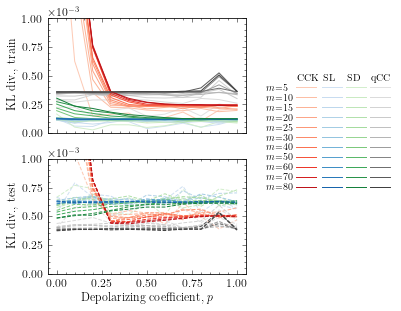

In [6]:
for ax in axs:
    ax.set_yscale("linear")
    ax.set(ylim=[0, 0.001])
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[0].set(ylabel="KL div., train")
axs[1].set(ylabel="KL div., test")
fig

In [10]:
io_save = IO(path=IO.render_path.joinpath("causal-models"))
style = StyleConfig()
style.save_figure(fig, filename=str(io_save.path.joinpath("depolarized-bell-state.pdf")))

Saving to C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\foqal\renders\causal-models\depolarized-bell-state.pdf


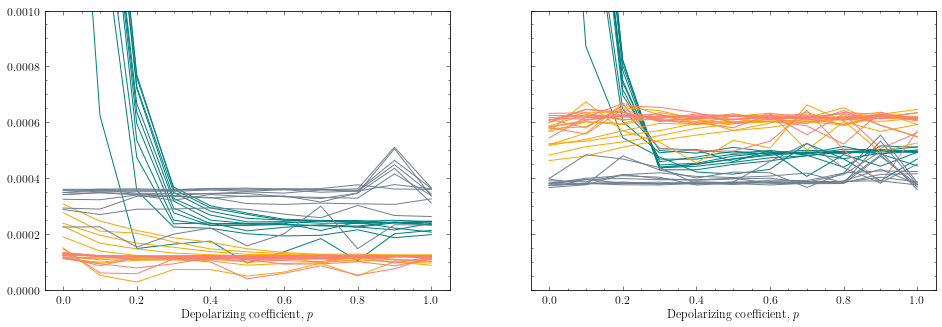

In [15]:
models = df['model'].unique()
colors = ['teal', 'orange', 'salmon', 'slategrey']

ms = df['m'].unique()
ps = df['p'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[15, 5], sharey='row')
for model, color in zip(models, colors):
    for m in ms:
        train = []
        test = []
        test_std = []
        for p in ps:
            dfi = df[(df['model']==model) & (df['m'] == m) & (df['p'] == p)]
            train.append(dfi[f'train_loss'].min())
            test.append(dfi[f'test_loss'].min())

        axs[0].plot(ps, train, color=color, label=f"{model}")
        axs[1].plot(ps, test, color=color)

for ax in axs:
    ax.set(xlabel='Depolarizing coefficient, $p$')
    ax.set(ylim=[0, 0.001])